# ANALIZA IZPOSOJE KNJIG

## PREDPRIPRAVA

Če datoteka podatki.csv še ne obstaja, jo ustvarimo s pomočjo skripte zajem_podatkov.py.

In [1]:
%matplotlib inline

import csv
import os
import requests
import sys
import pandas as pd
import matplotlib.pyplot as plt

#pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = 16
tabela = pd.read_csv('../podatki.csv', encoding='latin1')

In [3]:
import matplotlib.pyplot as plt

Predstavimo tabelo podatkov:

In [4]:
tabela

,naslov,avtor,izposoja,rezervacija,leto,mesec
0,Viharno nebo,"Wooding, Chris",1216,241,2002,1
1,Romeo in Julija,"Shakespeare, William",1151,773,2002,1
2,"Harry Potter, Jetnik iz Azkabana","Rowling, J. K.",1003,542,2002,1
3,"Harry Potter, Dvorana skrivnosti","Rowling, J. K.",956,633,2002,1
4,Od Ivana Preglja do Cirila KosmaÃÂa : izbor ...,,944,409,2002,1
5,Antigona,Sophocles,929,821,2002,1
6,"Harry Potter, Kamen modrosti","Rowling, J. K.",916,866,2002,1
7,Gospodar prstanov,"Tolkien, J. R. R.",912,1246,2002,1
8,"Harry Potter, Ognjeni kelih","Rowling, J. K.",813,715,2002,1
9,ResniÃÂna mladost,,759,238,2002,1


## ANALIZA

### NAJBOLJ IZPOSOJANI AVTORJI:

Predstavimo 20 najbolj izposojanih avtorjev:

In [15]:
pojavitve_avtorjev = tabela[['avtor','izposoja']].groupby('avtor').sum().sort_values('izposoja', ascending=False).unstack()

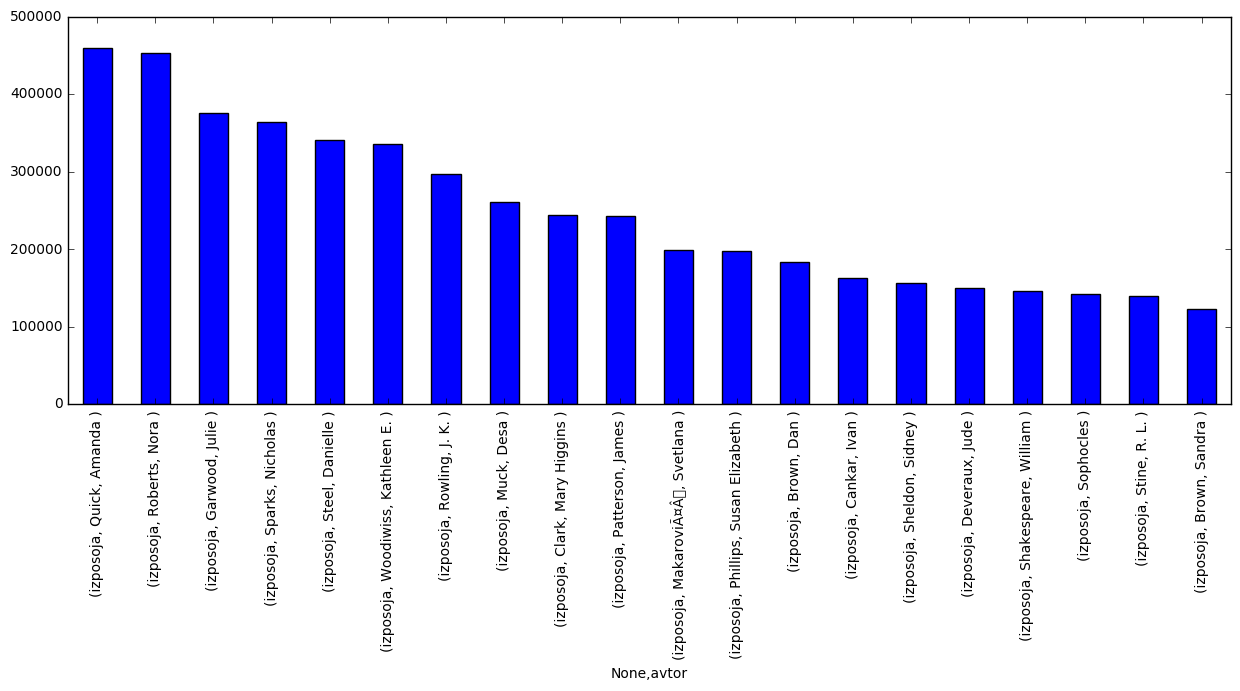

In [54]:
pojavitve_avtorjev[1:21].plot(kind='bar', style = 'seaborn-deep')

### NAJBOLJ IZPOSOJANE KNJIGE

In [17]:
pojavitve_naslovov = tabela[['naslov','izposoja']].groupby('naslov').sum().sort_values('izposoja', ascending=False).unstack()

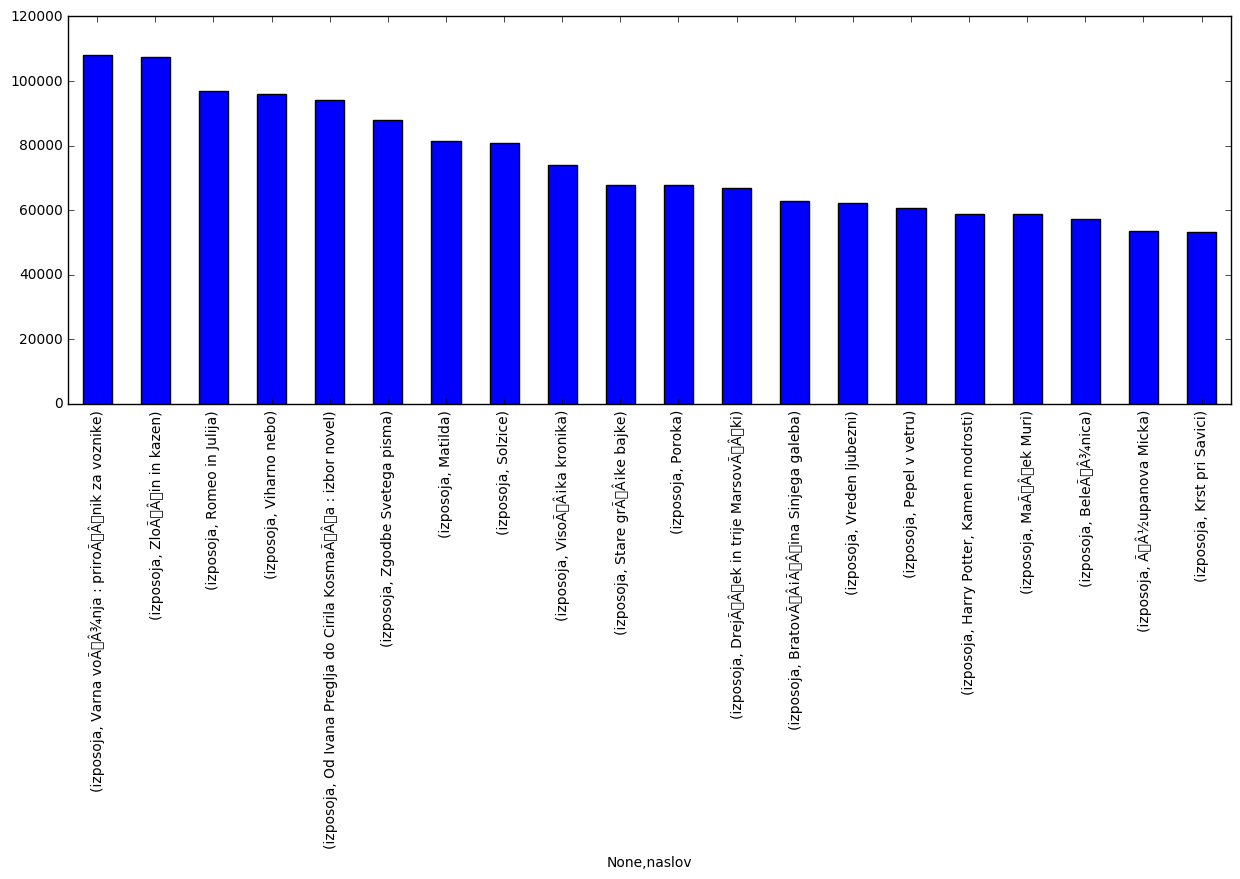

In [55]:
pojavitve_naslovov[1:21].plot(kind='bar', style = 'seaborn-deep')

Opazimo, da je več kot polovica (13 od 20) najbolj izposojanih knjigdomače branje v osnovni ali srednji šoli. 

### IZPOSOJA PREKO LETA

Opazujmo še povprešno izposojo preko leta: 

In [5]:
izposoja_po_mesecih = tabela[['mesec','izposoja', 'rezervacija']].groupby('mesec').mean()

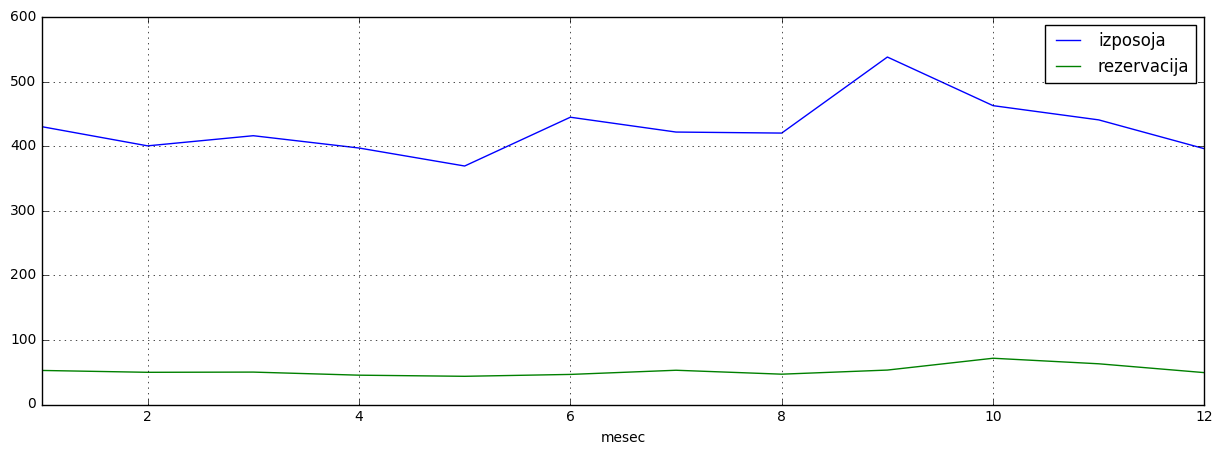

In [6]:
izposoja_po_mesecih.plot(grid = True)

### IZPOSOJA SKOZI ČAS

Zanima nas, kaj se dogaja z izposojo knjig v letih. Ali ta narašča ali pada?

In [7]:
izposoja_letno = tabela[['leto','izposoja', 'rezervacija']].groupby('leto').mean()

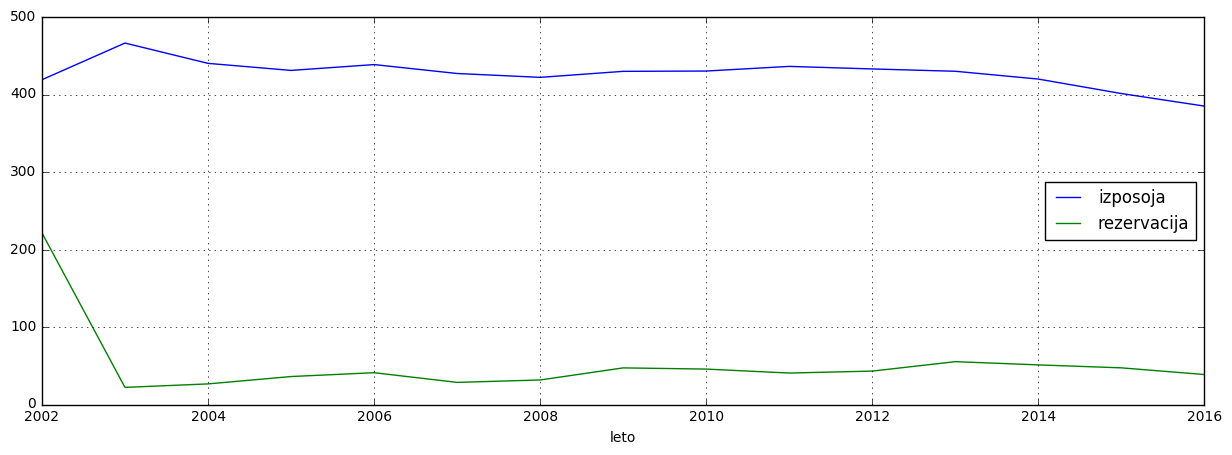

In [8]:
izposoja_letno.plot(grid = True)

Ker za leto 2016 manjkajo podatki za oktober, november in december, smo uporabili povprečno izposojo. Graf kaže, da povprečna izposoja rahlo pada. 

Uporabimo linearno regresijo:

In [31]:
izposoja_letno = tabela[['leto','izposoja']].groupby('leto').mean()

In [44]:
vsota_produktov = sum(izposoja_letno['izposoja']*tabela['leto'].unique())

In [42]:
n = len(izposoja_letno['izposoja'])

In [45]:
produkt_vsot = sum(izposoja_letno['izposoja'])*sum(tabela['leto'].unique())

In [48]:
vsota_kvadratov = sum(tabela['leto'].unique() * tabela['leto'].unique())

In [50]:
x = sum(tabela['leto'].unique())

In [51]:
kvadrat_vsote = x*x

In [52]:
b = (vsota_produktov - (1/n) * produkt_vsot)/(vsota_kvadratov - (1/n) * kvadrat_vsote)

In [53]:
b

-2.5904241071548313

In [58]:
a = izposoja_letno['izposoja'].mean() - b * tabela['leto'].unique().mean()

In [62]:
fit = b*tabela['leto'].unique()+a

In [63]:
fit

array([ 445.46849653,  442.87807242,  440.28764831,  437.69722421,
        435.1068001 ,  432.51637599,  429.92595188,  427.33552778,
        424.74510367,  422.15467956,  419.56425546,  416.97383135,
        414.38340724,  411.79298313,  409.20255903])

In [65]:
izposoja_letno['napoved'] = fit 

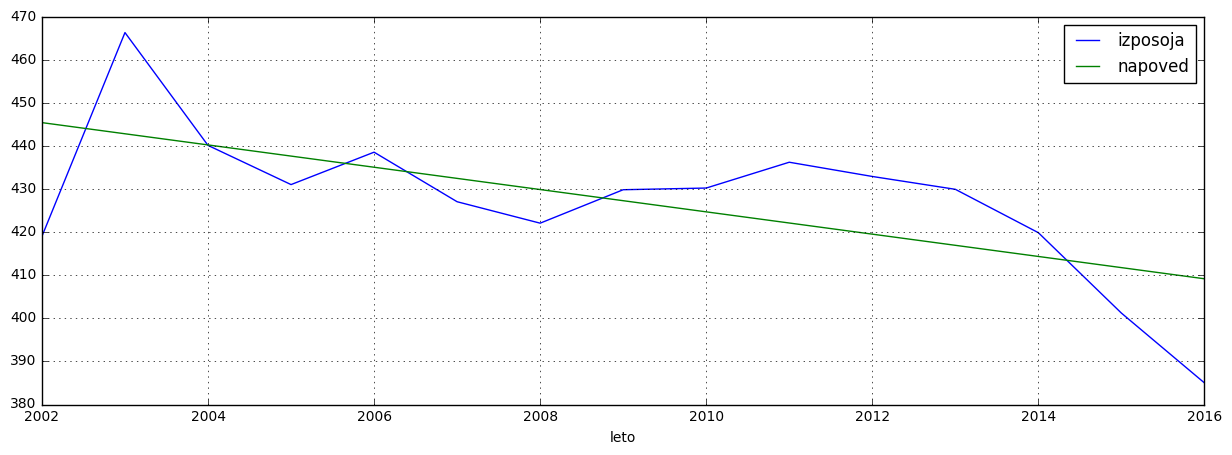

In [67]:
izposoja_letno.plot(grid = True)

In [71]:
apokalipsa = (200 - a) / b

In [72]:
apokalipsa

2096.7599645362588